<a href="https://colab.research.google.com/github/tsxepo-web/text-recognition-model/blob/main/IllustrationOfTransforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/pytorch/vision.git

Cloning into 'vision'...
remote: Enumerating objects: 469752, done.
remote: Counting objects: 100% (50210/50210), done.
remote: Compressing objects: 100% (2298/2298), done.
remote: Total 469752 (delta 47947), reused 50041 (delta 47836), pack-reused 419542
Receiving objects: 100% (469752/469752), 920.64 MiB | 29.92 MiB/s, done.
Resolving deltas: 100% (437035/437035), done.


In [3]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt

import torch
from torchvision.transforms import v2

plt.rcParams["savefig.bbox"] = 'tight'

# if you change the seed, make sure that the randomly-applied transforms
# properly show that the image can be both transformed and *not* transformed!
torch.manual_seed(0)

# If you're trying to run that on collab, you can download the assets and the
# helpers from https://github.com/pytorch/vision/tree/main/gallery/
from vision.gallery.transforms.helpers import plot
orig_img = Image.open(Path('/content/vision/gallery/assets') / 'astronaut.jpg')

Geometric Transformation
refers to the process of altering the geometric properties of an image, such as its shape, size, orientation, or position.

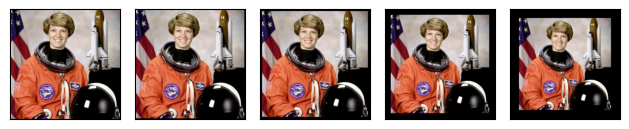

In [4]:
# Pad - which tranforms pads all image borders with some pixel values.
padded_imgs = [v2.Pad(padding=padding)(orig_img) for padding in (3, 10, 30, 50)]
plot([orig_img] + padded_imgs)

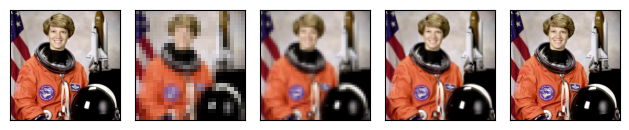

In [5]:
resized_imgs = [v2.Resize(size=size)(orig_img) for size in (30, 50, 100, orig_img.size)]
plot([orig_img] + resized_imgs)

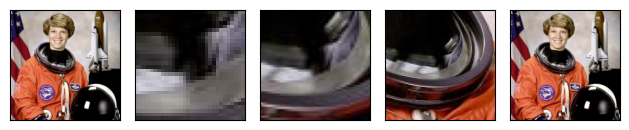

In [6]:
center_crops = [v2.CenterCrop(size=size)(orig_img) for size in (30, 50, 100, orig_img.size)]
plot([orig_img] + center_crops)

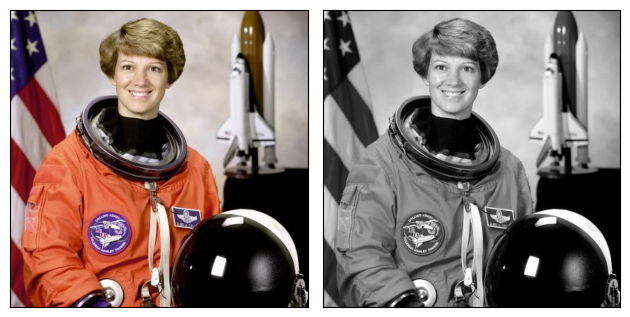

In [7]:
gray_img = v2.Grayscale()(orig_img)
plot([orig_img, gray_img], cmap='gray')

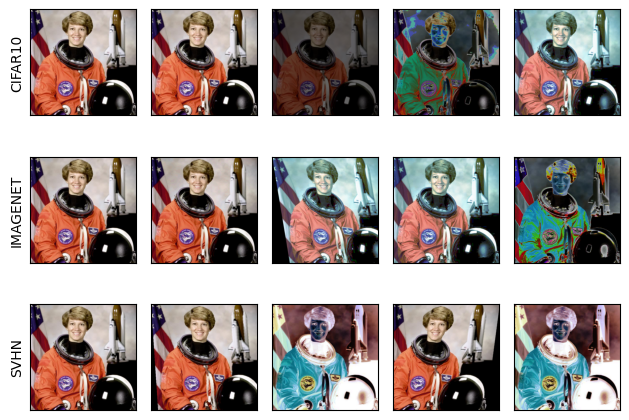

In [8]:
policies = [v2.AutoAugmentPolicy.CIFAR10, v2.AutoAugmentPolicy.IMAGENET, v2.AutoAugmentPolicy.SVHN]
augmenters = [v2.AutoAugment(policy) for policy in policies]
imgs = [
    [augmenter(orig_img) for _ in range(4)]
    for augmenter in augmenters
]
row_title = [str(policy).split('.')[-1] for policy in policies]
plot([[orig_img] + row for row in imgs], row_title=row_title)